# **A regression model for predicting the marks with number of hours given**
In the task the aim is to derive a solution where the machine can predict the score of a student by the hours studied by that 
particular student .


**STEP 1 : Importing all libraries for data visualisation**

In [96]:
# Importing all libraries for data visualisation
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [97]:
# Reading data from link provided
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

student_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploring the data**

In [98]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [99]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **STEP 2 : visualizing the data**

In [100]:
plt.style.use('seaborn-dark')

Text(0, 0.5, 'Scores obtained')

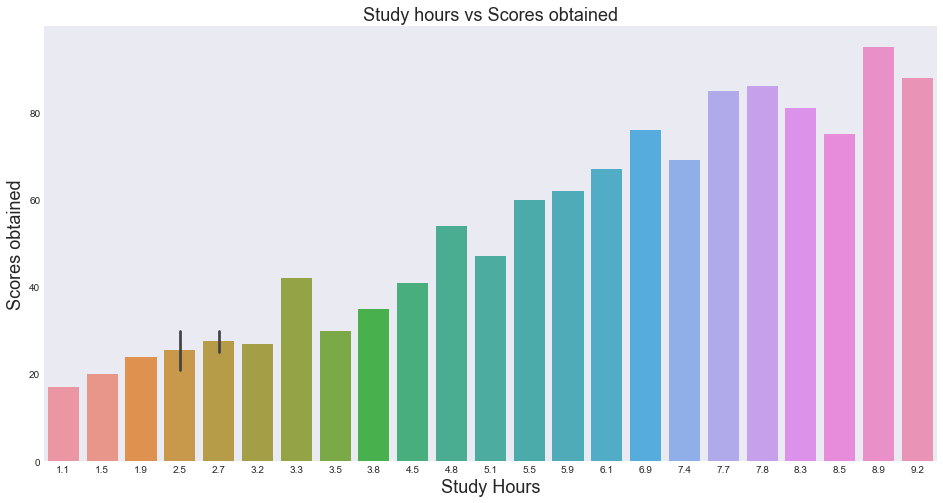

In [101]:
plt.figure(figsize=(16,8))
sns.barplot(x='Hours',y='Scores',data=student_data)
plt.title('Study hours vs Scores obtained',size=18)
plt.xlabel('Study Hours',size=18)
plt.ylabel('Scores obtained',size=18)

**creating a scatter plot to see the scatter data for Study Hours v/s Scores obtained**

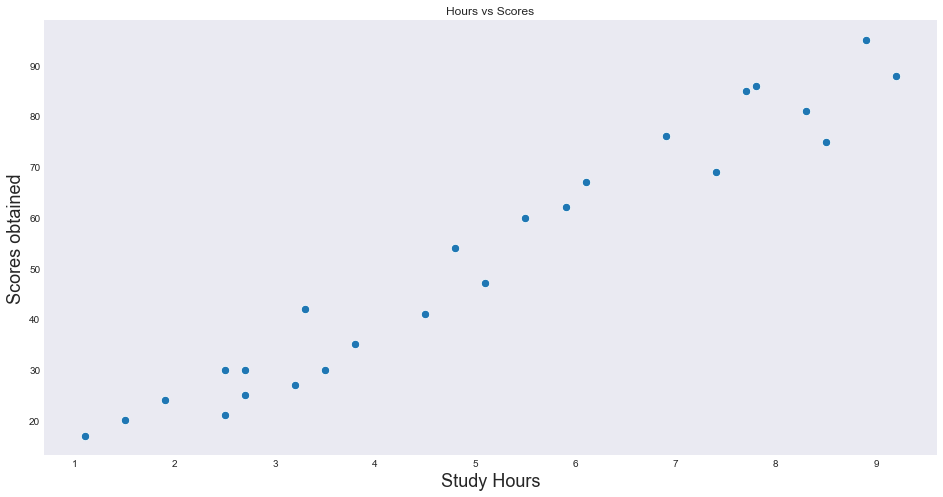

In [102]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Hours',y='Scores',data=student_data,palette='bright',s=70) 
plt.title('Hours vs Scores')  
plt.xlabel('Study Hours',size=18)
plt.ylabel('Scores obtained',size=18)
plt.show()

**From the graph above, we can say that the data grows continuously towards positive side and it will be easy for the machine to select the best fit line.**

### **STEP 3 : Preparing the data**

Once we have visualized the data now we can split the data into training and testing data.

In [103]:
X = student_data[['Hours']]
y = student_data['Scores']

Now that we have our attributes and labels, we can split the data into 70:30 ratio.
i.e 70% will be our train data and rest 30% will be testing data.

We will use sklearn's train_test_split to split the data into testing and training set

In [104]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42) 

### **Time to create a machine learning model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

As seen in graph the data is growning, so we can use linear regression to predict the data. Hence linear regression is the algorithm we have chosen here.

we have pre-written algorithm from sklearn and we are importing it here.

In [105]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**Now once the data are fitted to the model, we can try to plot the best fit line(regression line) which has less error.**

Finding the coefficient  of the data

In [106]:
print(lm.coef_)

[9.71054094]


Finding the intercept of the data

In [107]:
print(lm.intercept_)

2.794196676599803


Printing the best fit line

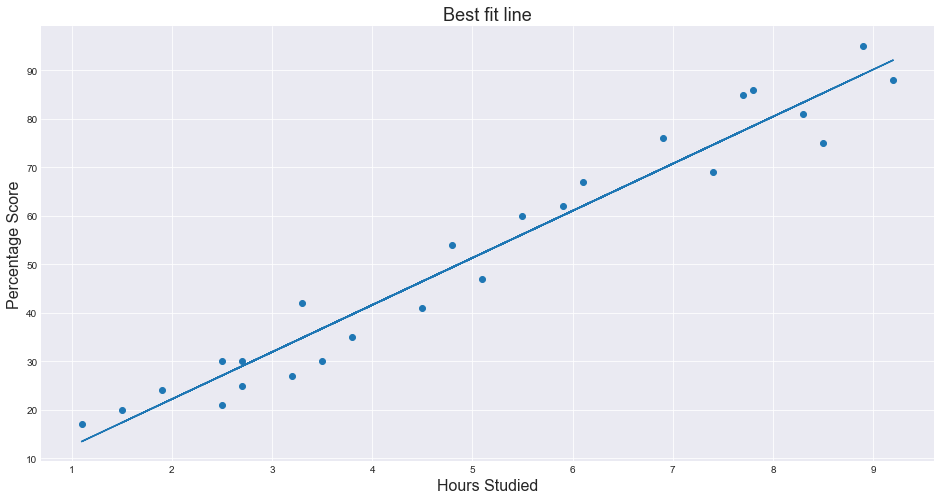

In [108]:
# Plotting the regression line
regression_line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.title('Best fit line',size=18)
plt.xlabel('Hours Studied',size=16)  
plt.ylabel('Percentage Score',size=16)
plt.grid()
plt.show()

### **STEP 4 : Prediction time**
Now that we have trained our algorithm, it's time to make some predictions.
We have splitted data for testing to use for predictions

In [109]:
predictions = lm.predict(X_test) 
predictions

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

inorder to check the correctness or the prediction value with the original test data, we will create a dataframe which has original data and predicted data.

In [110]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


**Here we can take input from the user and then predict the results**

In [112]:
# You can also test with your own data
# taking user input 
hours = int(input('Enter the hours studied : '))
user_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f} %".format(user_pred[0]))

Enter the hours studied : 8
No of Hours = 8
Predicted Score = 80.48 %


### **STEP 5 : Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

Sklearn provides pretty decent metrics evaluation which are inbuilt in this library

In [113]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.499999999999998


In [114]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)) 

Mean Squared Error: 23.61945761415174


In [115]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 4.859985351228103
